## &#10686; Zomato Data Analysis Mini-Project


In [1]:
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

url = 'https://raw.githubusercontent.com/yashchavan02/DEVL-MiniProject/main/public/ZomatoDataset.csv'

response = requests.get(url, stream=True)

directory = "../public"
filename = os.path.join(directory, "ZomatoDataset.csv")

if not os.path.exists(directory):
    os.makedirs(directory)
    
with open(filename, 'wb') as file:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            file.write(chunk)
            
df = pd.read_csv("../public/ZomatoDataset.csv")

In [3]:
df.shape

(45584, 20)

In [4]:
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [5]:
df.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26
45583,0x5fb2,RANCHIRES09DEL02,23.0,4.9,23.351058,85.325731,23.431058,85.405731,02-03-2022,17:10,17:15,Fog,Medium,2,Snack,scooter,1.0,No,Metropolitian,36


In [6]:
df.head(45000)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0x6544,MUMRES07DEL02,27.0,4.7,19.091458,72.827808,19.221458,72.957808,31-03-2022,23:10,23:25,Cloudy,Low,2,Buffet,electric_scooter,1.0,No,Metropolitian,26
44996,0xb54c,BANGRES05DEL02,25.0,4.2,12.970324,77.645748,13.050324,77.725748,02-04-2022,20:25,20:30,Cloudy,Jam,2,Meal,scooter,1.0,No,Urban,31
44997,0xc3f6,KOCRES18DEL02,27.0,4.9,9.957144,76.296783,10.087144,76.426783,14-02-2022,0.75,18:15,Windy,Medium,1,Snack,scooter,1.0,No,Metropolitian,22
44998,0xd158,KNPRES14DEL01,32.0,3.6,26.463504,80.372929,26.533504,80.442929,12-02-2022,23:45,1,Cloudy,Low,1,Snack,motorcycle,2.0,No,Metropolitian,35


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [8]:
df.drop("Restaurant_latitude", axis = 1, inplace = True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [9]:
df.drop("Restaurant_longitude", axis = 1, inplace = True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [10]:
df.drop("Delivery_location_latitude", axis = 1, inplace = True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [11]:
df.drop("Delivery_location_longitude", axis = 1, inplace = True)
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [12]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,1.023385,0.744635,26.293963
std,5.815064,0.334744,0.839055,0.572510,9.384298
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [13]:
df.dtypes

ID                          object
Delivery_person_ID          object
Delivery_person_Age        float64
Delivery_person_Ratings    float64
Order_Date                  object
Time_Orderd                 object
Time_Order_picked           object
Weather_conditions          object
Road_traffic_density        object
Vehicle_condition            int64
Type_of_order               object
Type_of_vehicle             object
multiple_deliveries        float64
Festival                    object
City                        object
Time_taken (min)             int64
dtype: object

In [14]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [15]:
df.drop("ID", axis = 1, inplace = True)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,AGRRES16DEL01,21.0,4.6,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,CHENRES08DEL03,30.0,4.9,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,COIMBRES11DEL01,20.0,4.7,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [16]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)'],
      dtype='object')

In [17]:
df[["Day","Month","Year"]] = df.Order_Date.str.split("-", expand = True)

In [18]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,DEHRES17DEL01,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,02,2022
1,KOCRES16DEL01,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,02,2022
2,PUNERES13DEL03,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,04,03,2022
3,LUDHRES15DEL02,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,02,2022
4,KNPRES14DEL02,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,02,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,03,2022
45580,AGRRES16DEL01,21.0,4.6,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,02,2022
45581,CHENRES08DEL03,30.0,4.9,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,03,2022
45582,COIMBRES11DEL01,20.0,4.7,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,07,03,2022


In [19]:
df.drop("Order_Date", axis = 1, inplace = True)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,DEHRES17DEL01,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,02,2022
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,02,2022
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,04,03,2022
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,02,2022
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,02,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,03,2022
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,02,2022
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,03,2022
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,07,03,2022


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       45584 non-null  object 
 1   Delivery_person_Age      43730 non-null  float64
 2   Delivery_person_Ratings  43676 non-null  float64
 3   Time_Orderd              43853 non-null  object 
 4   Time_Order_picked        45584 non-null  object 
 5   Weather_conditions       44968 non-null  object 
 6   Road_traffic_density     44983 non-null  object 
 7   Vehicle_condition        45584 non-null  int64  
 8   Type_of_order            45584 non-null  object 
 9   Type_of_vehicle          45584 non-null  object 
 10  multiple_deliveries      44591 non-null  float64
 11  Festival                 45356 non-null  object 
 12  City                     44384 non-null  object 
 13  Time_taken (min)         45584 non-null  int64  
 14  Day                   

In [21]:
df["Day"] = pd.to_numeric(df["Day"], errors = "coerce")
df["Month"] = pd.to_numeric(df["Month"], errors = "coerce")
df["Year"] = pd.to_numeric(df["Year"], errors = "coerce")
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month,Year
0,DEHRES17DEL01,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2,2022
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2,2022
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3,2022
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2,2022
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3,2022
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2,2022
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3,2022
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3,2022


In [22]:
df.drop("Year", axis = 1, inplace = True)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
0,DEHRES17DEL01,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       45584 non-null  object 
 1   Delivery_person_Age      43730 non-null  float64
 2   Delivery_person_Ratings  43676 non-null  float64
 3   Time_Orderd              43853 non-null  object 
 4   Time_Order_picked        45584 non-null  object 
 5   Weather_conditions       44968 non-null  object 
 6   Road_traffic_density     44983 non-null  object 
 7   Vehicle_condition        45584 non-null  int64  
 8   Type_of_order            45584 non-null  object 
 9   Type_of_vehicle          45584 non-null  object 
 10  multiple_deliveries      44591 non-null  float64
 11  Festival                 45356 non-null  object 
 12  City                     44384 non-null  object 
 13  Time_taken (min)         45584 non-null  int64  
 14  Day                   

In [24]:
df["Delivery_person_Age"] = pd.to_numeric(df["Delivery_person_Age"], errors = "coerce")
df["multiple_deliveries"] = pd.to_numeric(df["multiple_deliveries"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       45584 non-null  object 
 1   Delivery_person_Age      43730 non-null  float64
 2   Delivery_person_Ratings  43676 non-null  float64
 3   Time_Orderd              43853 non-null  object 
 4   Time_Order_picked        45584 non-null  object 
 5   Weather_conditions       44968 non-null  object 
 6   Road_traffic_density     44983 non-null  object 
 7   Vehicle_condition        45584 non-null  int64  
 8   Type_of_order            45584 non-null  object 
 9   Type_of_vehicle          45584 non-null  object 
 10  multiple_deliveries      44591 non-null  float64
 11  Festival                 45356 non-null  object 
 12  City                     44384 non-null  object 
 13  Time_taken (min)         45584 non-null  int64  
 14  Day                   

In [25]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
0,DEHRES17DEL01,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3


In [26]:
df.isna().sum()

Delivery_person_ID            0
Delivery_person_Age        1854
Delivery_person_Ratings    1908
Time_Orderd                1731
Time_Order_picked             0
Weather_conditions          616
Road_traffic_density        601
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         993
Festival                    228
City                       1200
Time_taken (min)              0
Day                           0
Month                         0
dtype: int64

In [27]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Day,Month
count,43730.000000,43676.000000,45584.000000,44591.000000,45584.000000,45584.000000,45584.000000
mean,29.566911,4.633774,1.023385,0.744635,26.293963,13.810920,2.980673
std,5.815064,0.334744,0.839055,0.572510,9.384298,8.708532,0.545939
min,15.000000,1.000000,0.000000,0.000000,10.000000,1.000000,2.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000,6.000000,3.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000,13.000000,3.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000,20.000000,3.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000,31.000000,4.000000


In [28]:
df.dropna(subset=["Time_Orderd"], inplace = True)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
0,DEHRES17DEL01,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3


In [29]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Day,Month
count,43639.000000,43585.000000,43853.000000,42910.000000,43853.000000,43853.000000,43853.000000
mean,29.554779,4.635280,1.000912,0.744092,26.293161,13.812920,2.980731
std,5.761378,0.313851,0.816543,0.572606,9.374274,8.712286,0.546120
min,20.000000,2.500000,0.000000,0.000000,10.000000,1.000000,2.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000,6.000000,3.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000,13.000000,3.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000,20.000000,3.000000
max,39.000000,5.000000,2.000000,3.000000,54.000000,31.000000,4.000000


In [30]:
df.isna().sum()

Delivery_person_ID            0
Delivery_person_Age         214
Delivery_person_Ratings     268
Time_Orderd                   0
Time_Order_picked             0
Weather_conditions            0
Road_traffic_density          0
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries         943
Festival                    219
City                       1144
Time_taken (min)              0
Day                           0
Month                         0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43853 entries, 0 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       43853 non-null  object 
 1   Delivery_person_Age      43639 non-null  float64
 2   Delivery_person_Ratings  43585 non-null  float64
 3   Time_Orderd              43853 non-null  object 
 4   Time_Order_picked        43853 non-null  object 
 5   Weather_conditions       43853 non-null  object 
 6   Road_traffic_density     43853 non-null  object 
 7   Vehicle_condition        43853 non-null  int64  
 8   Type_of_order            43853 non-null  object 
 9   Type_of_vehicle          43853 non-null  object 
 10  multiple_deliveries      42910 non-null  float64
 11  Festival                 43634 non-null  object 
 12  City                     42709 non-null  object 
 13  Time_taken (min)         43853 non-null  int64  
 14  Day                      43

In [32]:
df.dropna(subset=["City"], inplace = True)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
0,DEHRES17DEL01,36.0,4.2,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,12,2
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3


In [33]:
df.isna().sum()

Delivery_person_ID           0
Delivery_person_Age        206
Delivery_person_Ratings    259
Time_Orderd                  0
Time_Order_picked            0
Weather_conditions           0
Road_traffic_density         0
Vehicle_condition            0
Type_of_order                0
Type_of_vehicle              0
multiple_deliveries        910
Festival                   201
City                         0
Time_taken (min)             0
Day                          0
Month                        0
dtype: int64

In [34]:
mean_age = df['Delivery_person_Age'].mean()

df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(mean_age)


In [35]:
df.isna().sum()

Delivery_person_ID           0
Delivery_person_Age          0
Delivery_person_Ratings    259
Time_Orderd                  0
Time_Order_picked            0
Weather_conditions           0
Road_traffic_density         0
Vehicle_condition            0
Type_of_order                0
Type_of_vehicle              0
multiple_deliveries        910
Festival                   201
City                         0
Time_taken (min)             0
Day                          0
Month                        0
dtype: int64

In [36]:
mode_ratings = df['Delivery_person_Ratings'].mode()[0]

df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(mode_ratings)

In [37]:
df.isna().sum()

Delivery_person_ID           0
Delivery_person_Age          0
Delivery_person_Ratings      0
Time_Orderd                  0
Time_Order_picked            0
Weather_conditions           0
Road_traffic_density         0
Vehicle_condition            0
Type_of_order                0
Type_of_vehicle              0
multiple_deliveries        910
Festival                   201
City                         0
Time_taken (min)             0
Day                          0
Month                        0
dtype: int64

In [38]:
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(1)
df['Festival'] = df['Festival'].fillna("No")

In [39]:
df.isna().sum()

Delivery_person_ID         0
Delivery_person_Age        0
Delivery_person_Ratings    0
Time_Orderd                0
Time_Order_picked          0
Weather_conditions         0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Time_taken (min)           0
Day                        0
Month                      0
dtype: int64

In [40]:
Q1 = df['multiple_deliveries'].quantile(0.25)
Q3 = df['multiple_deliveries'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['multiple_deliveries'] > lower_bound) & (df['multiple_deliveries'] < upper_bound)]

In [41]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2
5,MUMRES15DEL03,29.0,4.5,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3


In [42]:
Q1 = df['Time_taken (min)'].quantile(0.25)
Q3 = df['Time_taken (min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Time_taken (min)'] > lower_bound) & (df['Time_taken (min)'] < upper_bound)]

In [43]:
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Day,Month
1,KOCRES16DEL01,21.0,4.7,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,13,2
2,PUNERES13DEL03,23.0,4.7,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,4,3
3,LUDHRES15DEL02,34.0,4.3,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,13,2
4,KNPRES14DEL02,24.0,4.7,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,14,2
5,MUMRES15DEL03,29.0,4.5,20:25,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,24,3
45580,AGRRES16DEL01,21.0,4.6,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,16,2
45581,CHENRES08DEL03,30.0,4.9,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,11,3
45582,COIMBRES11DEL01,20.0,4.7,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,7,3


In [44]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Day,Month
count,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000
mean,29.542493,4.636941,1.008866,0.732570,26.115829,13.793803,2.980513
std,5.750040,0.313127,0.815034,0.532481,9.052400,8.709397,0.546453
min,20.000000,2.500000,0.000000,0.000000,10.000000,1.000000,2.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000,6.000000,3.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000,13.000000,3.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000,20.000000,3.000000
max,39.000000,5.000000,2.000000,2.000000,51.000000,31.000000,4.000000


In [45]:
df = df [["Delivery_person_ID","Delivery_person_Age","Day","Month","Type_of_order","Time_Orderd","Time_Order_picked","multiple_deliveries","Time_taken (min)","City","Weather_conditions","Road_traffic_density","Type_of_vehicle","Vehicle_condition","Festival","Delivery_person_Ratings"]]
df

,Delivery_person_ID,Delivery_person_Age,Day,Month,Type_of_order,Time_Orderd,Time_Order_picked,multiple_deliveries,Time_taken (min),City,Weather_conditions,Road_traffic_density,Type_of_vehicle,Vehicle_condition,Festival,Delivery_person_Ratings
1,KOCRES16DEL01,21.0,13,2,Meal,14:55,15:05,1.0,23,Metropolitian,Stormy,High,motorcycle,1,No,4.7
2,PUNERES13DEL03,23.0,4,3,Drinks,17:30,17:40,1.0,21,Metropolitian,Sandstorms,Medium,scooter,1,No,4.7
3,LUDHRES15DEL02,34.0,13,2,Buffet,09:20,09:30,0.0,20,Metropolitian,Sandstorms,Low,motorcycle,0,No,4.3
4,KNPRES14DEL02,24.0,14,2,Snack,19:50,20:05,1.0,41,Metropolitian,Fog,Jam,scooter,1,No,4.7
5,MUMRES15DEL03,29.0,2,4,Buffet,20:25,20:35,1.0,20,Metropolitian,Sandstorms,Jam,electric_scooter,2,No,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,24,3,Meal,11:35,11:45,0.0,32,Metropolitian,Windy,High,motorcycle,1,No,4.8
45580,AGRRES16DEL01,21.0,16,2,Buffet,19:55,20:10,1.0,36,Metropolitian,Windy,Jam,motorcycle,0,No,4.6
45581,CHENRES08DEL03,30.0,11,3,Drinks,23:50,24:05:00,0.0,16,Metropolitian,Cloudy,Low,scooter,1,No,4.9
45582,COIMBRES11DEL01,20.0,7,3,Snack,13:35,13:40,1.0,26,Metropolitian,Cloudy,High,motorcycle,0,No,4.7


In [46]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Day', 'Month',
       'Type_of_order', 'Time_Orderd', 'Time_Order_picked',
       'multiple_deliveries', 'Time_taken (min)', 'City', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_vehicle', 'Vehicle_condition',
       'Festival', 'Delivery_person_Ratings'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42183 entries, 1 to 45583
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       42183 non-null  object 
 1   Delivery_person_Age      42183 non-null  float64
 2   Day                      42183 non-null  int64  
 3   Month                    42183 non-null  int64  
 4   Type_of_order            42183 non-null  object 
 5   Time_Orderd              42183 non-null  object 
 6   Time_Order_picked        42183 non-null  object 
 7   multiple_deliveries      42183 non-null  float64
 8   Time_taken (min)         42183 non-null  int64  
 9   City                     42183 non-null  object 
 10  Weather_conditions       42183 non-null  object 
 11  Road_traffic_density     42183 non-null  object 
 12  Type_of_vehicle          42183 non-null  object 
 13  Vehicle_condition        42183 non-null  int64  
 14  Festival                 42

In [48]:
df.dtypes

Delivery_person_ID          object
Delivery_person_Age        float64
Day                          int64
Month                        int64
Type_of_order               object
Time_Orderd                 object
Time_Order_picked           object
multiple_deliveries        float64
Time_taken (min)             int64
City                        object
Weather_conditions          object
Road_traffic_density        object
Type_of_vehicle             object
Vehicle_condition            int64
Festival                    object
Delivery_person_Ratings    float64
dtype: object

In [49]:
df.describe()

,Delivery_person_Age,Day,Month,multiple_deliveries,Time_taken (min),Vehicle_condition,Delivery_person_Ratings
count,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000,42183.000000
mean,29.542493,13.793803,2.980513,0.732570,26.115829,1.008866,4.636941
std,5.750040,8.709397,0.546453,0.532481,9.052400,0.815034,0.313127
min,20.000000,1.000000,2.000000,0.000000,10.000000,0.000000,2.500000
25%,25.000000,6.000000,3.000000,0.000000,19.000000,0.000000,4.500000
50%,30.000000,13.000000,3.000000,1.000000,26.000000,1.000000,4.700000
75%,35.000000,20.000000,3.000000,1.000000,32.000000,2.000000,4.900000
max,39.000000,31.000000,4.000000,2.000000,51.000000,2.000000,5.000000


In [50]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Day', 'Month',
       'Type_of_order', 'Time_Orderd', 'Time_Order_picked',
       'multiple_deliveries', 'Time_taken (min)', 'City', 'Weather_conditions',
       'Road_traffic_density', 'Type_of_vehicle', 'Vehicle_condition',
       'Festival', 'Delivery_person_Ratings'],
      dtype='object')

### &#10687; Impact of Weather on Delivery Time


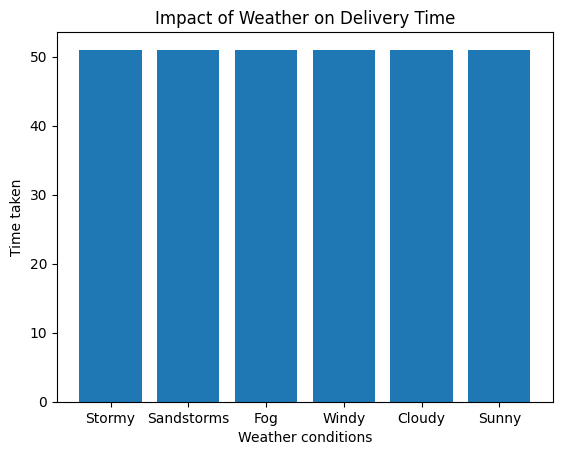

In [51]:
Weather_conditions = df['Weather_conditions']
Time_taken = df['Time_taken (min)']
plt.bar(Weather_conditions,Time_taken)
plt.title('Impact of Weather on Delivery Time')
plt.xlabel('Weather conditions')
plt.ylabel('Time taken')
plt.show()

### &#10687; Ratings vs Age of Delivery Person


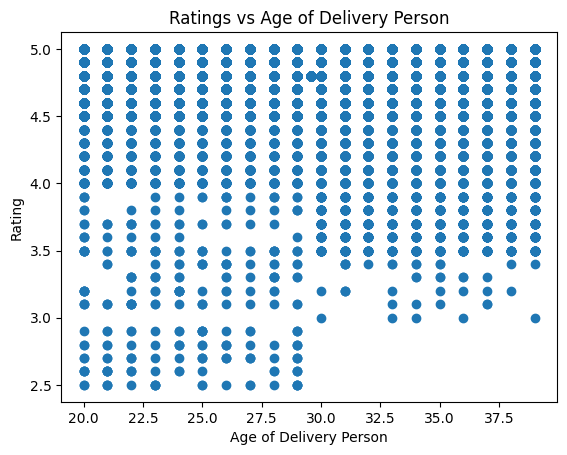

In [52]:
Ratings = df['Delivery_person_Ratings']
Delivery_person_Age = df['Delivery_person_Age']
plt.scatter(Delivery_person_Age,Ratings)
plt.title('Ratings vs Age of Delivery Person')
plt.xlabel('Age of Delivery Person')
plt.ylabel('Rating')
plt.show()

### &#10687; Delivery Time Distribution


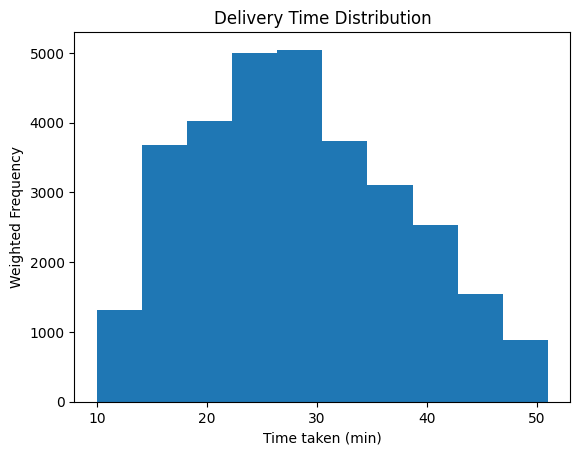

In [53]:
Time_taken = df['Time_taken (min)']
multiple_deliveries = df['multiple_deliveries']
plt.hist(Time_taken, weights=multiple_deliveries)
plt.title('Delivery Time Distribution')
plt.xlabel('Time taken (min)')
plt.ylabel('Weighted Frequency')
plt.show()

### &#10687; Type Of Order


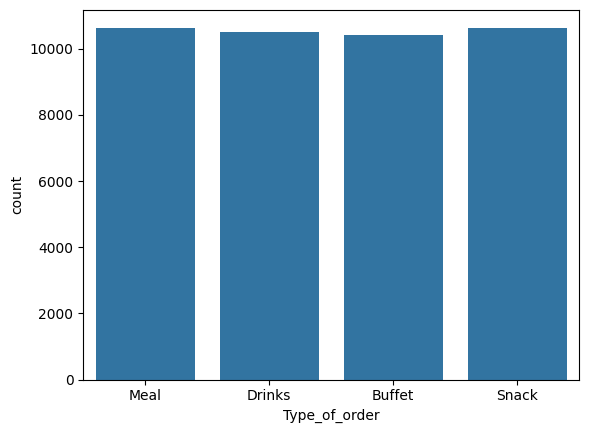

In [54]:
sns.countplot(x = df["Type_of_order"])
plt.show()

### &#10687; Time Taken For Delivery In Different type Of Cities


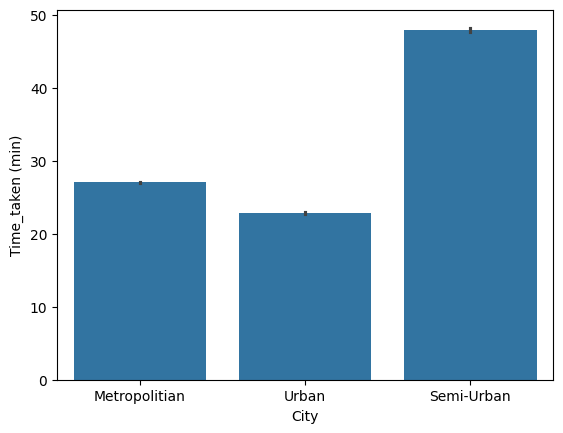

In [55]:
sns.barplot(x="City", y="Time_taken (min)", data = df)
plt.show()

### &#10687; No Of Customer That Order Multiple Times


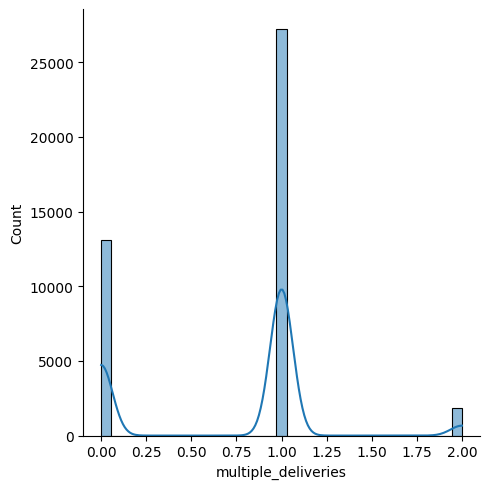

In [56]:
sns.displot(df['multiple_deliveries'], kde=True)
plt.show()

### &#10687; Check When People Order The Food At The Time Of Festival Or Non Festival Time


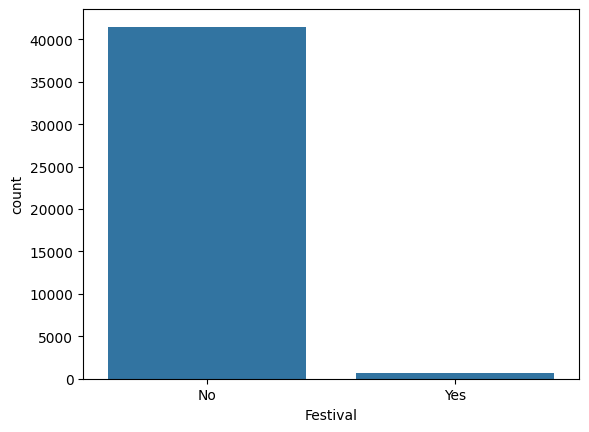

In [57]:
sns.countplot(x='Festival', data=df)
plt.show()

### &#10687; Univariate Analysis & Bivariate Analysis


In [58]:
cat=[]
num=[]
for column in df.columns:
  if df[column].nunique()>10:
    num.append(column)
  else:
    cat.append(column)

In [59]:
cat

['Month',
 'Type_of_order',
 'multiple_deliveries',
 'City',
 'Weather_conditions',
 'Road_traffic_density',
 'Type_of_vehicle',
 'Vehicle_condition',
 'Festival']

In [60]:
num

['Delivery_person_ID',
 'Delivery_person_Age',
 'Day',
 'Time_Orderd',
 'Time_Order_picked',
 'Time_taken (min)',
 'Delivery_person_Ratings']

In [61]:
M1=df.Type_of_order.value_counts()
print(M1)

Type_of_order
Snack     10635
Meal      10616
Drinks    10507
Buffet    10425
Name: count, dtype: int64


In [62]:
M2=df.City.value_counts()
print(M2)

City
Metropolitian    32392
Urban             9707
Semi-Urban          84
Name: count, dtype: int64


In [63]:
M3=df.Weather_conditions.value_counts()
print(M3)

Weather_conditions
Fog           7185
Stormy        7136
Cloudy        7054
Sandstorms    7009
Windy         6983
Sunny         6816
Name: count, dtype: int64


In [64]:
M4=df.Road_traffic_density.value_counts()
print(M4)

Road_traffic_density
Low       14543
Jam       13092
Medium    10374
High       4174
Name: count, dtype: int64


In [65]:
M4=df.Type_of_vehicle.value_counts()
print(M4)

Type_of_vehicle
motorcycle          24524
scooter             14218
electric_scooter     3441
Name: count, dtype: int64


In [66]:
M5=df.Festival.value_counts()
print(M5)

Festival
No     41488
Yes      695
Name: count, dtype: int64


### &#10687; Festival Analysis Using Pie Chart


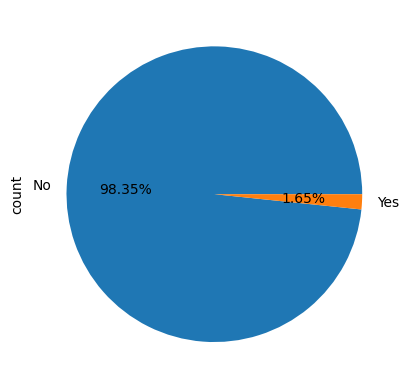

In [67]:
M=df.Festival.value_counts().plot(kind='pie',autopct='%1.2f%%')

### &#10687; Road Trafic Density Analysis Using Pie Chart


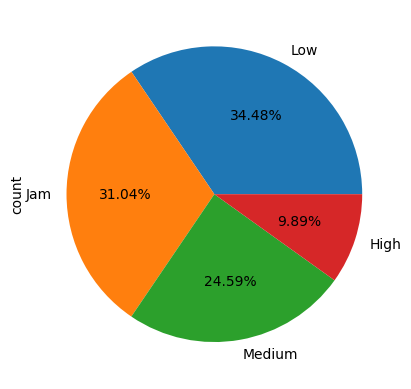

In [68]:
M=df.Road_traffic_density.value_counts().plot(kind='pie',autopct='%1.2f%%')

In [69]:
import warnings
warnings.simplefilter("ignore")

### &#10687; Univatiate Analysis : Categorical Variable.

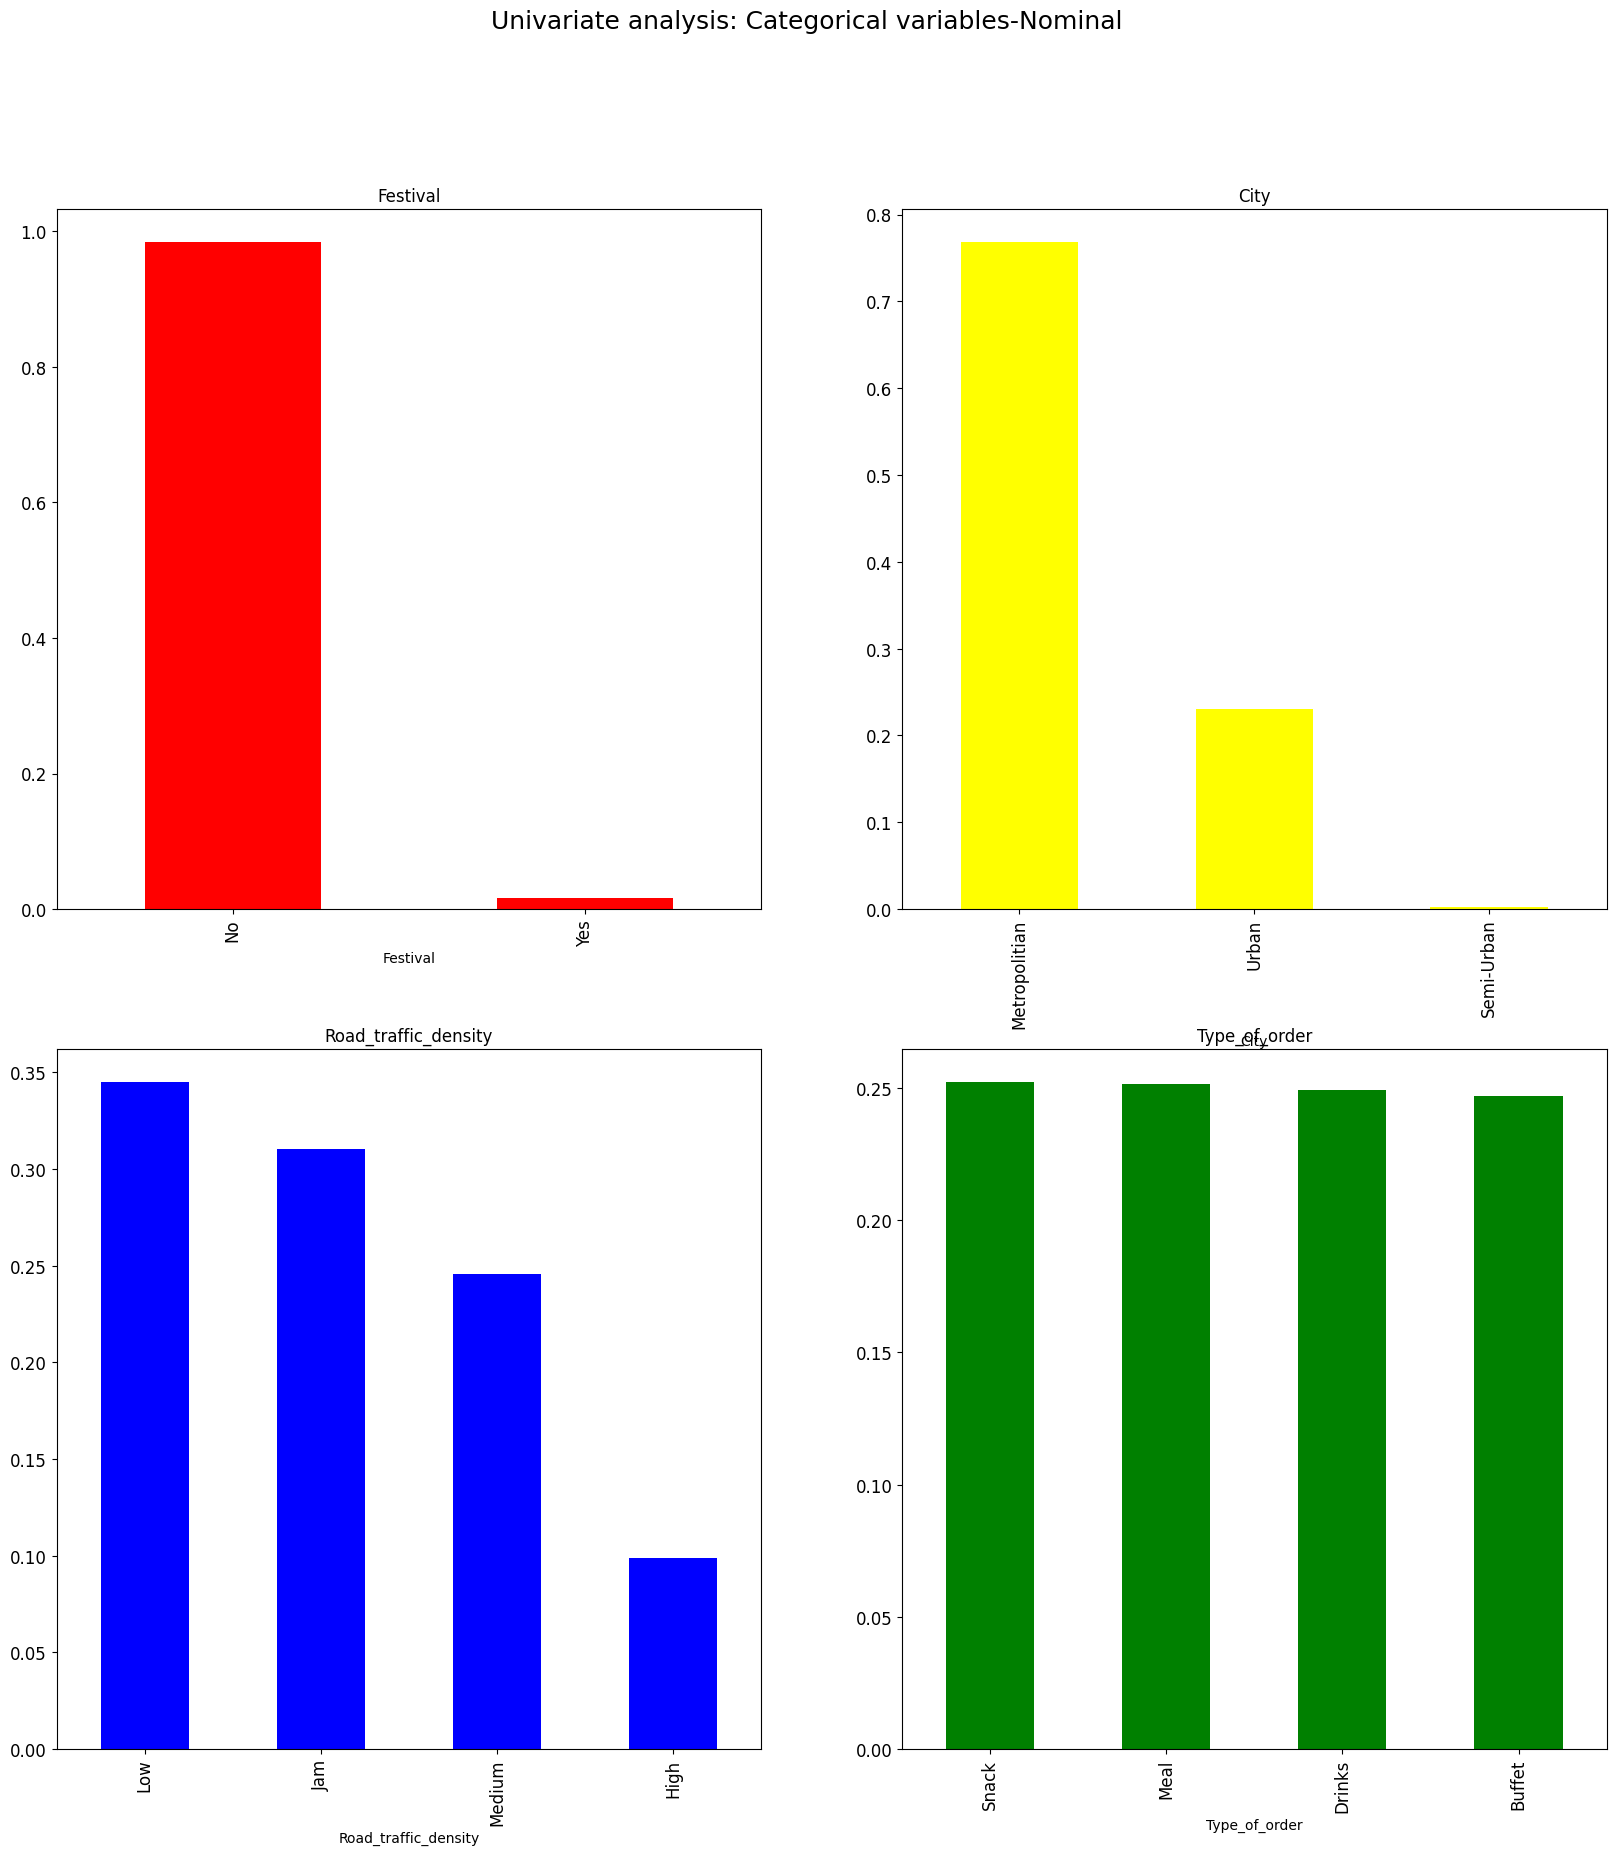

In [70]:
plt.subplot(221)
df['Festival'].value_counts(normalize=True).plot.bar(figsize=(20,20), title='Festival', fontsize=12, color='red')
plt.subplot(222)
df['City'].value_counts(normalize=True).plot.bar(figsize=(20,20), fontsize=12,title='City',color='yellow')
plt.subplot(223)
df['Road_traffic_density'].value_counts(normalize=True).plot.bar(figsize=(20,20),fontsize=12, title='Road_traffic_density',color='blue')
plt.subplot(224)
df['Type_of_order'].value_counts(normalize=True).plot.bar(figsize=(20,20),fontsize=12, title='Type_of_order', color='green')
plt.suptitle('Univariate analysis: Categorical variables-Nominal', fontsize=18)
plt.show()

### &#10687; Festival Vs Road Trafic Density Using Bar Plot

Road_traffic_density      High       Jam       Low    Medium
Festival                                                    
No                    0.099306  0.303871  0.349450  0.247373
Yes                   0.077698  0.697842  0.064748  0.159712


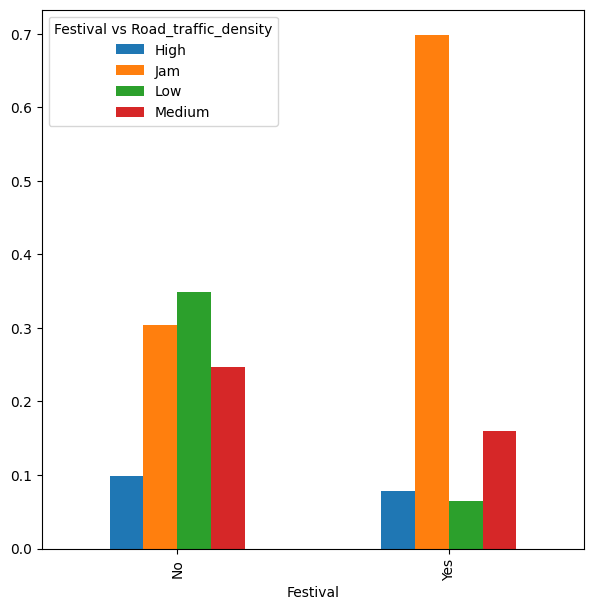

In [71]:
M1 = pd.crosstab(df.Festival, df.Road_traffic_density, normalize='index')
print(M1)
M1.plot.bar(figsize=(7,7),stacked=False)
plt.legend(title='Festival vs Road_traffic_density')
plt.show()

### &#10687; Weather Condition Vs Road Trafic Density Using Bar Plot

Road_traffic_density      High       Jam       Low    Medium
Weather_conditions                                          
Cloudy                0.100936  0.304650  0.348455  0.245960
Fog                   0.103688  0.311482  0.339875  0.244955
Sandstorms            0.093451  0.316308  0.347553  0.242688
Stormy                0.098094  0.302270  0.355101  0.244535
Sunny                 0.098005  0.313234  0.343163  0.245599
Windy                 0.099384  0.314478  0.334240  0.251897


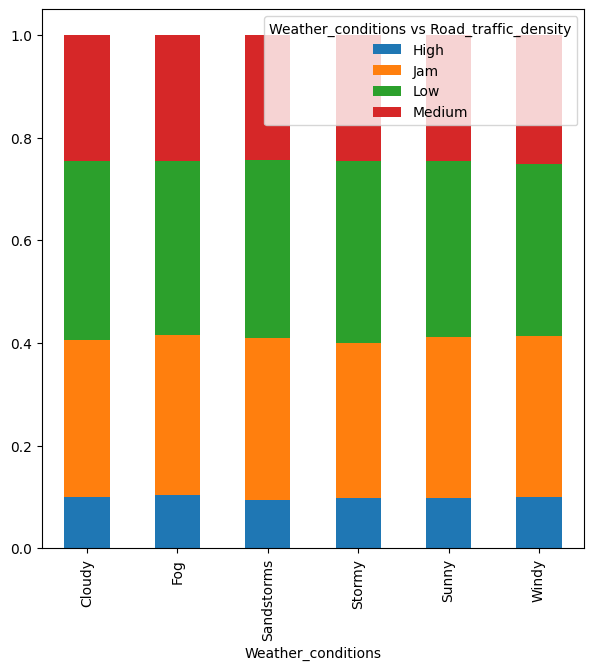

In [72]:
M1 = pd.crosstab(df.Weather_conditions, df.Road_traffic_density, normalize='index')
print(M1)
M1.plot.bar(figsize=(7,7),stacked=True)
plt.legend(title='Weather_conditions vs Road_traffic_density')
plt.show()

### &#10687; City Vs Type Of Order Analysis Using Bar Plot


Type_of_order    Buffet    Drinks      Meal     Snack
City                                                 
Metropolitian  0.246851  0.247685  0.253952  0.251513
Semi-Urban     0.261905  0.250000  0.142857  0.345238
Urban          0.247965  0.253734  0.244978  0.253322


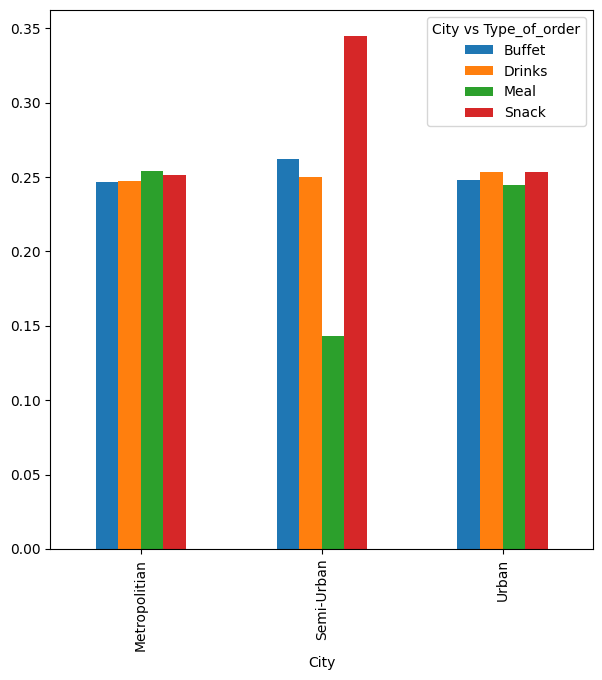

In [73]:
M1 = pd.crosstab(df.City, df.Type_of_order, normalize='index')
print(M1)
M1.plot.bar(figsize=(7,7),stacked=False)
plt.legend(title='City vs Type_of_order')
plt.show()

### &#10687; Delivery Time Taken in min Vs Road Trafic Density Using Bar Plot

<Axes: xlabel='Road_traffic_density', ylabel='Time_taken (min)'>

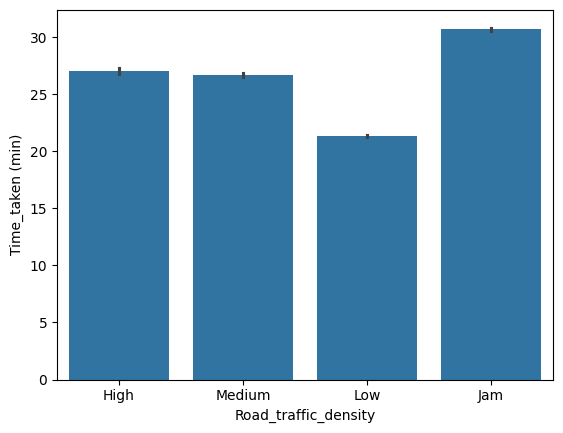

In [74]:
sns.barplot(x='Road_traffic_density', y='Time_taken (min)',data=df)

### &#10687; Festival Vs Delivery Time Taken in min Using Bar Plot

<Axes: xlabel='Festival', ylabel='Time_taken (min)'>

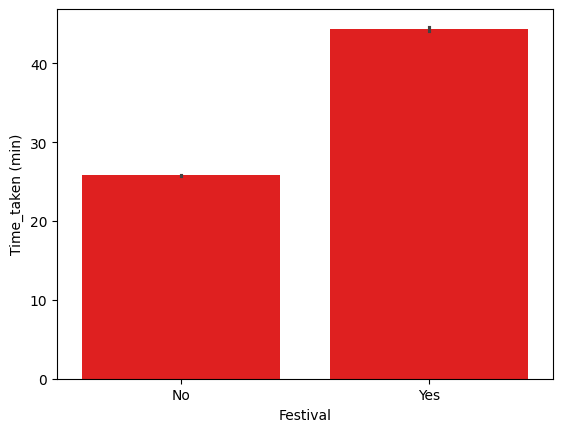

In [75]:
sns.barplot(x='Festival', y='Time_taken (min)',data=df, color = 'red')

### &#10687; Delivery Person Age Vs Delivery Person Ratings Using Histogram Plot

<Axes: xlabel='Delivery_person_Age', ylabel='Delivery_person_Ratings'>

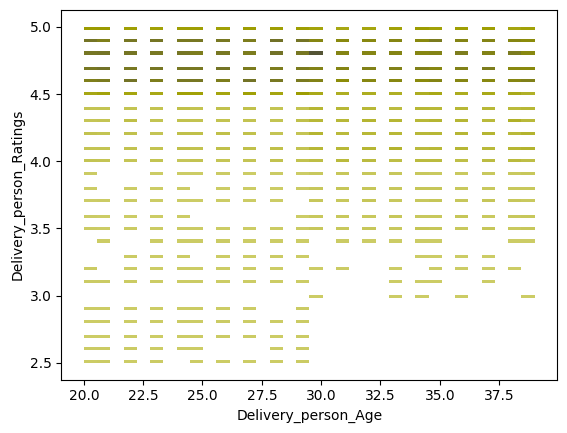

In [76]:
sns.histplot(x='Delivery_person_Age', y='Delivery_person_Ratings',data=df, color = 'yellow')

## ✪ 1. Delivery time prediction (Using Linear Regression)

In [77]:
import warnings
warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
df['City'].replace({"Metropolitian":3, "Urban":2, "Semi-Urban":1}, inplace=True)
df['Festival'] = df['Festival'].replace({"Yes":1, "No":0})
df['Road_traffic_density'].replace({"Jam":4, "Low":1, "Medium":2, "High":3 }, inplace=True)
df['Weather_conditions'].replace({"Fog":1, "Stormy":5, "Windy":2, "Sandstorms":3,"Cloudy":4, "Sunny":5}, inplace=True)
df['Type_of_vehicle'].replace({"scooter":2, "motorcycle":1, "electric_scooter":3}, inplace=True)
df['Type_of_order'].replace({"Drinks":1, "Buffet":2, "Snack":3, "Meal":4}, inplace=True)

In [79]:
df.dtypes

Delivery_person_ID          object
Delivery_person_Age        float64
Day                          int64
Month                        int64
Type_of_order                int64
Time_Orderd                 object
Time_Order_picked           object
multiple_deliveries        float64
Time_taken (min)             int64
City                         int64
Weather_conditions           int64
Road_traffic_density         int64
Type_of_vehicle              int64
Vehicle_condition            int64
Festival                     int64
Delivery_person_Ratings    float64
dtype: object

In [80]:
df.drop("Delivery_person_ID",axis = 1,inplace = True)
df.drop("Time_Orderd",axis = 1,inplace = True)
df.drop("Time_Order_picked",axis = 1,inplace = True)

In [81]:
df.dtypes

Delivery_person_Age        float64
Day                          int64
Month                        int64
Type_of_order                int64
multiple_deliveries        float64
Time_taken (min)             int64
City                         int64
Weather_conditions           int64
Road_traffic_density         int64
Type_of_vehicle              int64
Vehicle_condition            int64
Festival                     int64
Delivery_person_Ratings    float64
dtype: object

In [82]:
x = df.drop("Time_taken (min)", axis = 1)
y = df["Time_taken (min)"]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [84]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [85]:
print(model.intercept_)
print(model.coef_)

41.44973501835186
[ 3.80753982e-01  1.12889611e-02 -7.24566040e-02  1.68254815e-02
  3.19667816e+00  2.01614070e+00 -7.80938464e-01  2.50886251e+00
 -3.32915387e-02 -2.08627742e+00  1.13994814e+01 -7.74065558e+00]


In [86]:
y_pred = model.predict(x_test)
print(y_pred)

[32.01172977 37.31252086 15.326335   ... 36.76515219 11.74115308
 26.96165121]


In [87]:
df.head()

,Delivery_person_Age,Day,Month,Type_of_order,multiple_deliveries,Time_taken (min),City,Weather_conditions,Road_traffic_density,Type_of_vehicle,Vehicle_condition,Festival,Delivery_person_Ratings
1,21.0,13,2,4,1.0,23,3,5,3,1,1,0,4.7
2,23.0,4,3,1,1.0,21,3,3,2,2,1,0,4.7
3,34.0,13,2,2,0.0,20,3,3,1,1,0,0,4.3
4,24.0,14,2,3,1.0,41,3,1,4,2,1,0,4.7
5,29.0,2,4,2,1.0,20,3,3,4,3,2,0,4.5


In [88]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [89]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 6.496354269065995
R² Score: 0.4877799595950948


## ✪ 2. Delivery person ratings prediction (Using Linear Regression)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
X = df.drop('Delivery_person_Ratings', axis=1)
y = df['Delivery_person_Ratings']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [93]:
print(y_test)

5499     4.5
5678     5.0
21138    4.8
27803    4.7
22757    4.6
        ... 
40169    4.8
30879    4.6
18058    4.9
12221    4.7
12258    4.6
Name: Delivery_person_Ratings, Length: 8437, dtype: float64


In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [95]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [96]:
print(model1.intercept_)
print(model1.coef_)

-2.6645352591003757e-15
[ 1.26868752e-17  1.11022302e-16 -3.98986399e-16  6.93889390e-17
  7.21644966e-16  1.11022302e-16 -1.11022302e-16  8.32667268e-17
  2.25514052e-16  1.71737624e-16 -7.84095011e-16  1.00000000e+00]


In [97]:
y_pred = model1.predict(x_test)
print(y_pred)

[4.5 5.  4.8 ... 4.9 4.7 4.6]


In [98]:
df.head()

,Delivery_person_Age,Day,Month,Type_of_order,multiple_deliveries,Time_taken (min),City,Weather_conditions,Road_traffic_density,Type_of_vehicle,Vehicle_condition,Festival,Delivery_person_Ratings
1,21.0,13,2,4,1.0,23,3,5,3,1,1,0,4.7
2,23.0,4,3,1,1.0,21,3,3,2,2,1,0,4.7
3,34.0,13,2,2,0.0,20,3,3,1,1,0,0,4.3
4,24.0,14,2,3,1.0,41,3,1,4,2,1,0,4.7
5,29.0,2,4,2,1.0,20,3,3,4,3,2,0,4.5


In [99]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [100]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 1.4244790677884837e-15
R² Score: 1.0
